In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [38]:
from sqlalchemy.sql import label

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Engine connection for queries
connection = engine.connect()

In [7]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables via use of Base class 
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement =  Base.classes.measurement
station = Base.classes.station

In [10]:
# Identify columns in each table
inspector = inspect(engine)

print("Measurement Table Columns")
m_columns = inspector.get_columns('measurement')
for column in m_columns:
    print(column["name"], column["type"])

print ('\nStation Table Columns')
s_columns = inspector.get_columns('station')
for column in s_columns:
    print(column["name"], column["type"])

Measurement Table Columns
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Station Table Columns
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Identify the max date in the database
lastDate = session.query(func.max(measurement.date)).all()[0][0]
#print(f'The max date in the dataset is: {lastDate}, its type is {type(max_date)} \n')

# Convert date to datetime format
dt_max_date = dt.datetime.strptime(lastDate, '%Y-%m-%d')

# Calculate the date 1 year prior to last date in database
date_year_prior = dt_max_date - dt.timedelta(days=365)
#print(f'365 days prior to last date in dataset: {year_prior.date()} \n')

# Perform a query to retrieve the data and precipitation scores
results = (session.query(measurement.date, measurement.prcp).
           filter(measurement.date>=date_year_prior).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(results, columns=['Date','Precipitation'])
c_precipitation_df = precipitation_df.dropna()

# Format Date column to date time
c_precipitation_df['Date'] = pd.to_datetime(c_precipitation_df['Date'], yearfirst=True)

# Sort the dataframe by date
sorted_precip = c_precipitation_df.sort_values(by=['Date'])
sorted_precip

C:\Users\szerp\Anacoda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Precipitation
0,2016-08-24,0.08
1188,2016-08-24,1.22
702,2016-08-24,2.28
1875,2016-08-24,1.45
360,2016-08-24,2.15
...,...,...
2221,2017-08-22,0.50
359,2017-08-23,0.00
1523,2017-08-23,0.08
1005,2017-08-23,0.00


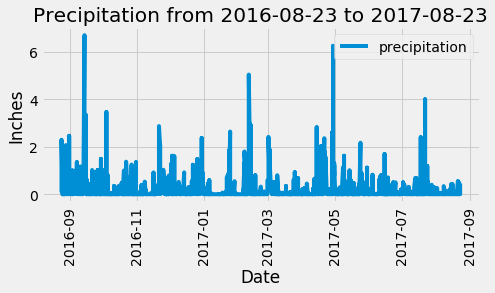

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(7,3))
plt.plot(sorted_precip['Date'], sorted_precip['Precipitation'])
plt.title(f'Precipitation from {date_year_prior.date()} to {lastDate}')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.legend(['precipitation'], loc='upper right')
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary_df = sorted_precip[['Precipitation']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

,Precipitation
mean,0.176462
median,0.020000
var,0.211865
std,0.460288
sem,0.010254


In [25]:
# Design a query to show how many stations are available in this dataset
station_results = session.query(func.count(station.station)).all()
station_results

[(9)]

In [80]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_freq = (session.query(station.station, func.count(measurement.station).label('station_count')).
                filter(station.station == measurement.station).
                group_by(station.name).
                order_by((station_count).desc()).
                all())
station_freq

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


[('USC00519397', 53.0, 87.0, 73.09795396419437)]

In [90]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=None,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    normed=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
